In [206]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [207]:
import numpy as np
import pandas as pd

In [208]:
import datetime as dt
import datedelta

# Reflect Tables into SQLAlchemy ORM

In [217]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [218]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [219]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [220]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [221]:
# Create the classes 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [222]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [223]:
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
print(columns)

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [224]:
columnstat = inspector.get_columns('station')
print(columns)

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


# Exploratory Climate Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [1]:



# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


### Calculate the date 1 year ago from the last data point in the database

In [39]:
# Find the last date in the Measurement class object

last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()[::-1]
last_date

[('2017-08-23')]

In [82]:
# Calculate the date 1 year ago from the last data point in the database

# As discussed on Slack homework channel, I used datedelta (https://pypi.org/project/datedelta/)
# I'd like to know how to convert these into variables that I could put into the query in the next cell.

first_date=dt.date(2017,8,23) - datedelta.YEAR
first_date

datetime.date(2016, 8, 23)

### Perform a query to retrieve the date and precipitation values

In [146]:
# Retrieve the date and precipitation values

date_prcp=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
type(date_prcp)

list

### Save the query results as a Pandas DataFrame and set the index to the date column

In [147]:
# Save the query results as a Pandas DataFrame

date_prcp_df=pd.DataFrame(date_prcp)
date_prcp_df.head()

# Set the index to the date column

date_prcp_df=date_prcp_df.set_index('date')
date_prcp_df.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


### Sort the dataframe by date

In [151]:
# Sort by date

date_prcp_df=date_prcp_df.sort_values(by=['date'], ascending=True)
date_prcp_df.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.70


### Use Pandas Plotting with Matplotlib to plot the data

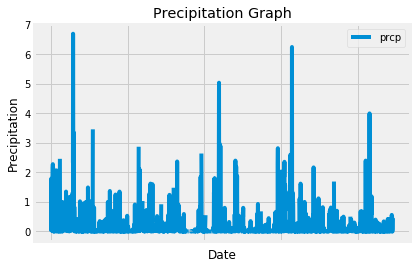

In [167]:
# Use Pandas Plotting with Matplotlib to plot the data

date_prcp_df.plot()
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.title('Precipitation Graph')
plt.show()

![precipitation](Images/precipitation.png)

### Calculate the summary statistics for the precipitation data

In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [102]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(Station.station).distinct().count()
stations

9

### What are the most active stations? (i.e. what stations have the most rows)?

In [98]:
# List the stations and the counts in descending order.

active_stations_desc = session.query(Measurement.station, func.count(Measurement.station)).\
       group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations_desc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [113]:
most_active_station= session.query(Measurement.station, func.count(Measurement.station)).\
       group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station

('USC00519281', 2772)

### Using the station id from the previous query, calculate the lowest temperature recorded, 
### highest temperature recorded, and average temperature of the most active station?

In [121]:
# Lowest temperature

lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(lowest_temp)

[('USC00519281', 54.0)]


In [122]:
# Highest temperature

highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(highest_temp)


[('USC00519281', 85.0)]


In [123]:
# Average temperature

avg_temp= session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(avg_temp)

[('USC00519281', 71.66378066378067)]


In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

![precipitation](Images/station-histogram.png)

 ### Query the last 12 months of temperature observation data for the most active station 
 ### and plot the results as a histogram

In [173]:
highest_obs = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date.between('2016-08-23', '2017-08-23')).filter(Measurement.station == 'USC00519281').all()
obs_df = pd.DataFrame(highest_obs)
obs_df.head(3)

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0


In [174]:
obs_df.describe()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


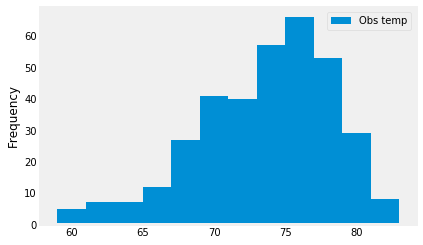

In [177]:
## Histogram in pandas to look like the example histogram
# But this is not plotting the frequency of observations, it is actually the temperature.

plt.hist(obs_df.tobs,bins=12)

plt.legend(["Obs temp"])
plt.ylabel("Frequency")
plt.grid()

plt.show()

### Function to calculate the minimum, average, and maximum temperatures for that range of dates

In [183]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [190]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_temps=calc_temps('2017-06-01', '2017-06-07')
print(trip_temps)
type(trip_temps)
trip_temps.append(81-74)
print(trip_temps)

[(74.0, 77.84444444444445, 81.0)]
[(74.0, 77.84444444444445, 81.0), 7]


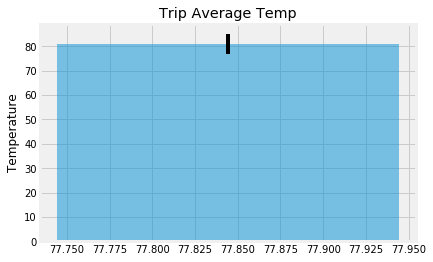

In [199]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.bar(trip_temps[0][1], trip_temps[0][2], align='center', alpha=0.5, yerr=[4])
plt.xticks()
plt.ylabel('Temperature')
plt.title('Trip Average Temp')

plt.show()


In [229]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_rain=session.query(func.avg(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude,Station.elevation).\
    group_by(Measurement.station).\
    filter(Measurement.date.between('2017-06-01', '2017-06-07')).\
    order_by(func.count(Measurement.station).desc()).all()

print(trip_rain)

[(0.06857142857142859, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (0.054285714285714264, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (0.04999999999999996, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (0.002857142857142857, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (0.021428571428571425, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (0.16999999999999993, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (None, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


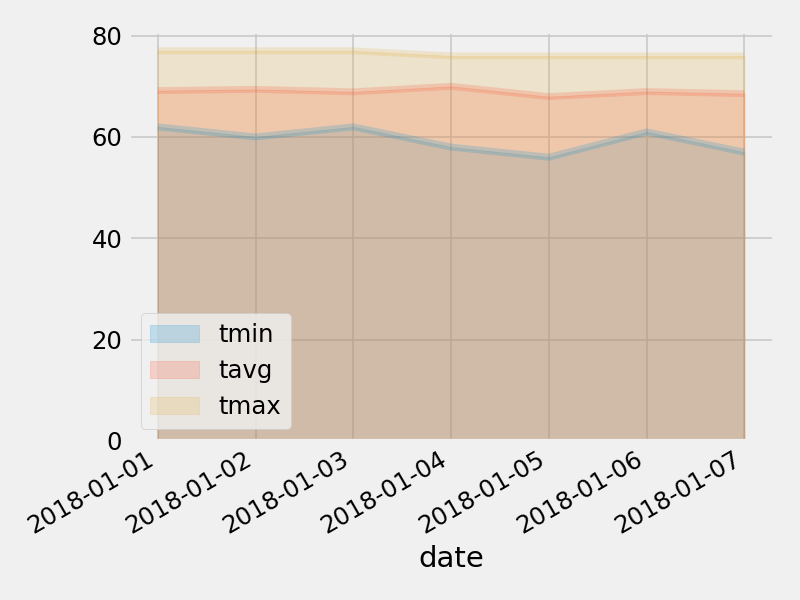

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
